# Part 1: Reconstruction of a positive wavefunction

## Getting Started

The following imports are needed to run this tutorial:

In [1]:
from rbm_tutorial import RBM_Module, BinomialRBM
import torch
from observables_tutorial import TFIMChainEnergy, TFIMChainMagnetization
import numpy as np
import csv
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

*rbm_tutorial.py* contains the child class **BinomialRBM** that inherits properties and functions from the parent class **RBM_Module**. 
 
PyTorch is used as a replacement for doing some algebra that would normally be done with numpy. PyTorch also allows one to take advantage of GPU acceleration among many other things. If a GPU card is not available, the tutorial will run on a CPU by default.

*observables_tutorial.py* is a class that will allow us to calculate physical properties like the energy and magnetization from samples generated by the trained RBM.

## Training

Let's beging with training the RBM on a positive wavefunction. We consider the quantum Ising model with Hamiltonian $H=-J\sum_{\langle i j \rangle} S^z_i S^z_j - h \sum_i S^x_i$
at its quantum critical point $h/J=1$.  The training data has been generated and is contained in the file *tfim1d_N10_train_samples.txt*.  It contains 10,000 measurements of the $S^z$ states of 10 qubits, represented as zeros or ones.

To evaluate how well the RBM is training, we compute the fidelity, $|\langle \psi|\psi_{\rm RBM} \rangle|^2$, between the true wavefunction of the system and the wavefunction the RBM reconstructs. First, we need to load our training data and the true wavefunction of this system.

In [2]:
train_set = np.loadtxt('tfim1d_N10_train_samples.txt', dtype= 'float32')
true_psi  = torch.tensor(np.loadtxt('tfim1d_N10_psi.txt', dtype= 'float32'), dtype=torch.double, device = torch.device('cpu'))

The following arguments are required to construct a **BinomialRBM** object:

1. **The number of visible units, *num_visible***. This is 10 for the case of our dataset.
2. **The number of hidden units in the hidden layer of the RBM, *num_hidden***. This number is set to the number of visible units by default (10 in the case of our dataset).

In [3]:
num_visible = train_set.shape[-1] # 10
num_hidden  = train_set.shape[-1] # 10

A **BinomialRBM** object has a function called *fit* that performs the training. *fit* takes the following arguments:

1. **train_set**: needed for selecting mini batches of the data
2. **true_psi**: only needed here to compute the fidelity
3. **epochs**: the number of epochs, i.e. training cycles that will be performed; 1000 should be fine
4. **batch_size**: the number of data points that each mini batch will contain; we'll go with 100
5. **k**: the number of contrastive divergence steps; k=1 seems to be good enough in most cases
6. **lr**: the learning rate; we will use a learning rate of 0.01 here
7. **log_every**: how often you would like the program to update you during the training; we choose 50 - that is, every 50 epochs the program will print out the fidelity

In [8]:
epochs     = 2000
batch_size = 50
k          = 2
lr         = 0.005
log_every  = 50

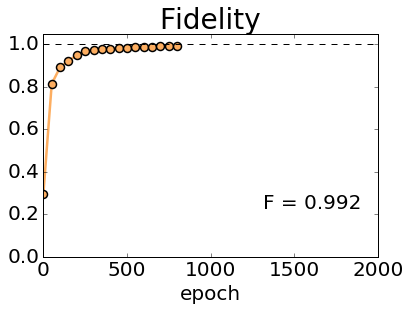

KeyboardInterrupt: 

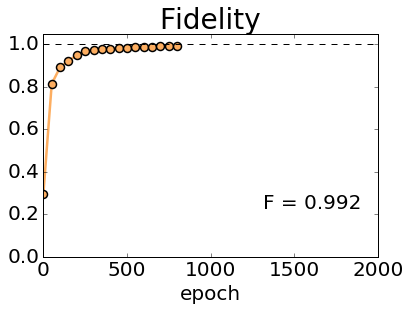

In [9]:
rbm_real = BinomialRBM(num_visible, num_hidden)
rbm_real.fit(train_set, true_psi, epochs, batch_size, k, lr, log_every)

## After Training 

After training your RBM, the *fit* function will have saved your trained weights and biases. Now, we can generate samples from our trained RBM and calculate physical observables. Let's calculate the energy and the magnetization of newly generated samples.

**TFIMChainEnergy** and **TFIMChainMagnetization** objects (from *observables_tutorial.py*) have a sampler function called *sample* built into them. They will generate samples from the RBM distribution that was just learned in the training procedure, compute the observables and plot the computed values as a function of the Gibbs step.

All that needs to be done is to feed in the following arguments into the objects' *sample* functions:

1. **sampler**: the RBM object that we've trained
2. **num_samples**: the number of samples we wish to generate
3. **k**: the number of Gibbs steps that will be used to generate samples


In [ ]:
rbm_energy = TFIMChainEnergy(h=1.0) # TFIMChainEnergy requires the h value for initialization
energies = rbm_energy.sample(sampler=rbm_real, num_samples=3000, k=100)

In [ ]:
rbm_mag    = TFIMChainMagnetization()
magnetizations = rbm_mag.sample(sampler=rbm_real, num_samples=3000, k=100)

You can see a brief transient period in each observable, before the state of the machine "warms up" to equilibrium.  After that, the values fluctuate around the mean.  The exact value for the energy is -1.2785, and for the magnetization is 0.7072.

And there you have it! For more information on using QuCumber on your machine, please refer to [here](../tutorial.rst). If you are interested in learning about training a **ComplexRBM** object, please click next.